In [14]:
#Lectura del conjunto de datos
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib.pyplot as plt 
%pylab inline 
data =pd.read_csv("KDDCup99.csv")
data.head()
data.transpose()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['array']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,0,1,2,3,4,5,6,7,8,9,...,494010,494011,494012,494013,494014,494015,494016,494017,494018,494019
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Encontrar los datos que faltan
def num_missing(x):
  return sum(x.isnull())

#Aplicando por columna:
print("Valores perdidos por columna:")
print(data.apply(num_missing, axis=0)) #axis=0 define que función se debe aplicar en cada columna

Valores perdidos por columna:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate

In [16]:
#Número de filas
print("Incluyendo todos los tipos de ataques, el número total de conexiones es ",len(data))

Incluyendo todos los tipos de ataques, el número total de conexiones es  494020


In [17]:
#Diferentes tipos de ataques en la base de datos
data['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [18]:
#crear un archivo CSV con nombres de atributos 
with open('KDDCup99-preproces.csv', 'w',newline='') as out:
    writer=csv.writer(out)
    writer.writerow(['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
                     'hot','num_failed_logins','logged_in','lnum_compromised','lroot_shell','lsu_attempted','lnum_root','lnum_file_creations',
                     'lnum_shells','lnum_access_files','lnum_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                     'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
                     'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label'])


In [19]:
#Extracción de ataques DoS del conjunto de datos
a=['back','land','neptune','pod','smurf','teardrop','normal']
b=['back','land','neptune','pod','smurf','teardrop']
with open('KDDCup99.csv', 'r') as inp, open('KDDCup99-preproces.csv', 'a',newline='') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        if row[41] in a:
            writer.writerow(row)

In [20]:
#Creación de un nuevo marco de datos con un conjunto de datos modificado
%pylab inline 
datapre=pd.read_csv("KDDCup99-preproces.csv")
datapre.head()
datapre.transpose()

Populating the interactive namespace from numpy and matplotlib


,0,1,2,3,4,5,6,7,8,9,...,488725,488726,488727,488728,488729,488730,488731,488732,488733,488734
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
datapre['label'].value_counts()

smurf       280790
neptune     107201
normal       97277
back          2203
teardrop       979
pod            264
land            21
Name: label, dtype: int64

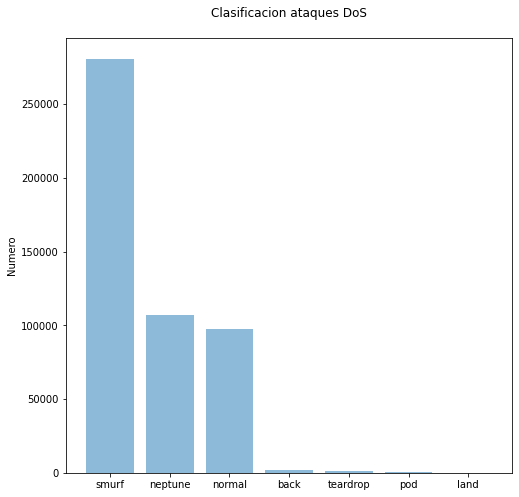

In [22]:
#Gráfico de barras para clasificar los ataques DoS
objects = ('smurf', 'neptune', 'normal', 'back', 'teardrop', 'pod', 'land')
y_pos = np.arange(len(objects))
performance = [280790,107201,97277,2203,979,264,21]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Numero')
plt.title('Clasificacion ataques DoS\n')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [23]:
#Asignación de datos categóricos
cleanup_nums = {"protocol_type":     {"tcp": 1, "icmp": 2, "udp": 3},
                "service": {"vmnet": 1, "smtp": 2, "ntp_u":3, "shell":4, "kshell":5, "aol":6, "imap4":7, "urh_i":8, "netbios_ssn":9,
                           "tftp_u":10, "mtp":11, "uucp":12, "nnsp":13, "echo":14, "tim_i":15, "ssh":16, "iso_tsap":17, "time":18,
                           "netbios_ns":19,"systat":20, "hostnames":21, "login":22, "efs":23, "supdup":24, "http_8001":25, "courier":26,
                           "ctf":27,"finger":28,"nntp":29,"ftp_data":30,"red_i":31,"ldap":32,"http":33,"ftp":34,"pm_dump":35,"exec":36,
                           "klogin":37,"auth":38,"netbios_dgm":39,"other":40,"link":41,"X11":42,"discard":43,"private":44,"remote_job":45,
                           "IRC":46,"daytime":47,"pop_3":48,"pop_2":49,"gopher":50,"sunrpc":51,"name":52,"rje":53,"domain":54,"uucp_path":55,
                           "http_2784":56,"Z39_50":57,"domain_u":58,"csnet_ns":59,"whois":60,"eco_i":61,"bgp":62,"sql_net":63,"printer":64,
                           "telnet":65,"ecr_i":66,"urp_i":67,"netstat":68,"http_443":69,"harvest":70},
               "flag":{"RSTR":1,"S3":2,"SF":3,"RSTO":4,"SH":5,"OTH":6,"S2":7,"RSTOS0":8,"S1":9,"S0":10,"REJ":11}}
#Sustitución de los datos codificados 
datapre.replace(cleanup_nums, inplace=True)
datapre.head()
datapre.transpose()

,0,1,2,3,4,5,6,7,8,9,...,488725,488726,488727,488728,488729,488730,488731,488732,488733,488734
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
service,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
flag,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Sustituir todos los tipos de ataques DoS por 1 y otros por 0
datapre['label'][datapre['label']!='normal'] = 'attack'
datapre['label'][datapre['label']=='normal'] = 0
datapre['label'][datapre['label']=='attack'] = 1
datapre[['label']] = datapre[['label']].apply(pd.to_numeric)
datapre['label'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

1    391458
0     97277
Name: label, dtype: int64

In [25]:
# Muestreo del 25% de los datos sin reemplazo
from sklearn.model_selection import train_test_split
# Generar el conjunto de muestras a partir del conjunto de entrenamiento.  Establecer random_state para poder replicar los resultados.
sampleset1 = datapre.sample(frac=0.5, random_state=1)
sampleset = sampleset1.sample(frac=0.5, random_state=1)
# Imprimir la forma del conjunto de muestras.
sampleset['label'].value_counts()

1    97754
0    24430
Name: label, dtype: int64

In [26]:
#Trabajar con este conjunto de datos con la matriz característica-objeto x y los valores de la variable objetivo y.
array=sampleset.values
x=array[:,0:41]
y=array[:,41]

In [27]:
#Validación cruzada
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Dividir el conjunto de datos de entrenamiento en un 70% de datos de entrenamiento y un 30% de datos de prueba de forma aleatoria
features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.3, random_state=42)

------------------------------------------
Accuracy =  93.88367525098211  %
[[ 5183  2049]
 [  193 29231]]
              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82      7232
         1.0       0.93      0.99      0.96     29424

    accuracy                           0.94     36656
   macro avg       0.95      0.86      0.89     36656
weighted avg       0.94      0.94      0.94     36656



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Unrecognized location 'abajo a la derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


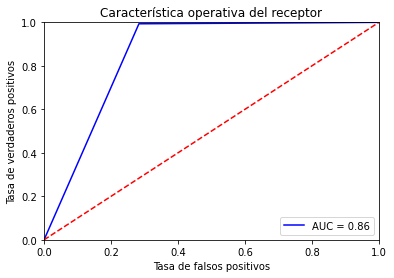

In [28]:
#Clasificador Naive Bayes
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Característica operativa del receptor')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'abajo a la derecha')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()


In [29]:
#Aplicación de la regresión logística para encontrar características importantes. Cuanto más alto sea el rango más importante es el atributo
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, step = 10)
fit = rfe.fit(x, y)
print("Num. característica: ",fit.n_features_)
print("Característica seleccionada: ",fit.support_)
print("Clasificación de las características: ",fit.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Num. característica:  20
Característica seleccionada:  [ True  True  True  True False False False  True False  True False  True
  True False False  True False False False False False False  True  True
  True  True False False  True False  True False False  True  True  True
 False  True  True False False]
Clasificación de las características:  [1 1 1 1 3 4 4 1 4 1 4 1 1 4 4 1 3 4 4 4 4 3 1 1 1 1 3 3 1 3 1 3 2 1 1 1 3
 1 1 3 3]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [30]:
#Aplicación del árbol de decisión para encontrar características importantes. Cuanto mayor sea la puntuación, más importante será el atributo
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
# mostrar la importancia relativa de cada atributo
print(model.feature_importances_)

[3.56608930e-04 3.79343713e-02 6.79667592e-02 3.61506224e-02
 7.56585125e-03 1.54828830e-03 3.93133455e-05 7.75826458e-03
 0.00000000e+00 6.60076604e-03 9.38022891e-07 1.42008444e-01
 8.46902360e-03 1.77677879e-06 1.80026144e-08 3.22712846e-06
 1.22133987e-06 8.27667009e-08 3.42221970e-06 0.00000000e+00
 0.00000000e+00 6.29611133e-05 1.61539440e-01 1.08077870e-01
 1.95955456e-02 2.30113574e-02 5.74485768e-03 1.18003124e-02
 7.87713673e-02 3.66656810e-03 1.81844100e-02 8.71053001e-02
 2.59541372e-02 3.01426941e-02 8.10307478e-03 7.09890434e-02
 1.34741512e-03 5.57567136e-03 1.13444064e-02 8.23668519e-03
 4.33788301e-03]


In [31]:
#Eliminación de todos los demás atributos no seleccionados del conjunto de datos
datapre.drop('duration', axis = 1, inplace = True)
print("Drop duration")
datapre.drop('flag', axis = 1, inplace = True)
print("Drop flag")
datapre.drop('dst_bytes', axis = 1, inplace = True)
print("Drop dst_bytes")
datapre.drop('land', axis = 1, inplace = True)
print("Drop land")
datapre.drop('wrong_fragment', axis = 1, inplace = True)
print("Drop wrong_fragment")
datapre.drop('urgent', axis = 1, inplace = True)
print("Drop urgent")
datapre.drop('hot', axis = 1, inplace = True)
print("Drop hot")
datapre.drop('num_failed_logins', axis = 1, inplace = True)
print("Drop num_failed_logins")
datapre.drop('logged_in', axis = 1, inplace = True)
print("Drop logged_in")
datapre.drop('lnum_compromised', axis = 1, inplace = True)
print("Drop lnum_compromised")
datapre.drop('lroot_shell', axis = 1, inplace = True)
print("Drop lroot_shell")
datapre.drop('lsu_attempted', axis = 1, inplace = True)
print("Drop lsu_attempted")
datapre.drop('lnum_root', axis = 1, inplace = True)
print("Drop lnum_root")
datapre.drop('lnum_file_creations', axis = 1, inplace = True)
print("Drop lnum_file_creations")
datapre.drop('lnum_shells', axis = 1, inplace = True)
print("Drop lnum_shells")
datapre.drop('lnum_access_files', axis = 1, inplace = True)
print("Drop lnum_access_files")
datapre.drop('lnum_outbound_cmds', axis = 1, inplace = True)
print("Drop lnum_outbound_cmds")
datapre.drop('is_host_login', axis = 1, inplace = True)
print("Drop is_host_login")
datapre.drop('is_guest_login', axis = 1, inplace = True)
print("Drop is_guest_login")
datapre.drop('srv_count', axis = 1, inplace = True)
print("Drop srv_count")
datapre.drop('serror_rate', axis = 1, inplace = True)
print("Drop serror_rate")
datapre.drop('srv_serror_rate', axis = 1, inplace = True)
print("Drop srv_serror_rate")
datapre.drop('rerror_rate', axis = 1, inplace = True)
print("Drop rerror_rate")
datapre.drop('srv_rerror_rate', axis = 1, inplace = True)
print("Drop srv_rerror_rate")
datapre.drop('diff_srv_rate', axis = 1, inplace = True)
print("Drop diff_srv_rate")
datapre.drop('srv_diff_host_rate', axis = 1, inplace = True)
print("Drop srv_diff_host_rate")
datapre.drop('dst_host_count', axis = 1, inplace = True)
print("Drop dst_host_count")
datapre.drop('dst_host_srv_count', axis = 1, inplace = True)
print("Drop dst_host_srv_count")
datapre.drop('dst_host_diff_srv_rate', axis = 1, inplace = True)
print("Drop dst_host_diff_srv_rate")
datapre.drop('dst_host_srv_diff_host_rate', axis = 1, inplace = True)
print("Drop dst_host_srv_diff_host_rate")
datapre.drop('dst_host_serror_rate', axis = 1, inplace = True)
print("Drop dst_host_serror_rate")
datapre.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
print("Drop dst_host_srv_serror_rate")
datapre.drop('dst_host_rerror_rate', axis = 1, inplace = True)
print("Drop dst_host_rerror_rate")
datapre.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
print("Drop dst_host_srv_rerror_rate")

Drop duration
Drop flag
Drop dst_bytes
Drop land
Drop wrong_fragment
Drop urgent
Drop hot
Drop num_failed_logins
Drop logged_in
Drop lnum_compromised
Drop lroot_shell
Drop lsu_attempted
Drop lnum_root
Drop lnum_file_creations
Drop lnum_shells
Drop lnum_access_files
Drop lnum_outbound_cmds
Drop is_host_login
Drop is_guest_login
Drop srv_count
Drop serror_rate
Drop srv_serror_rate
Drop rerror_rate
Drop srv_rerror_rate
Drop diff_srv_rate
Drop srv_diff_host_rate
Drop dst_host_count
Drop dst_host_srv_count
Drop dst_host_diff_srv_rate
Drop dst_host_srv_diff_host_rate
Drop dst_host_serror_rate
Drop dst_host_srv_serror_rate
Drop dst_host_rerror_rate
Drop dst_host_srv_rerror_rate


In [32]:
#Escribir los datos extraídos en un nuevo archivo
datapre.to_csv("KDDCup99DoS.csv",encoding='utf-8', index=False)
datapre.head()

,protocol_type,service,src_bytes,count,same_srv_rate,dst_host_same_srv_rate,dst_host_same_src_port_rate,label
0,1,33,181,8,1.0,1.0,0.11,0
1,1,33,239,8,1.0,1.0,0.05,0
2,1,33,235,8,1.0,1.0,0.03,0
3,1,33,219,6,1.0,1.0,0.03,0
4,1,33,217,6,1.0,1.0,0.02,0


In [33]:
#Muestreo del 25% de los datos con reemplazo
from sklearn.model_selection import train_test_split
# Generar el conjunto de muestras a partir del conjunto de entrenamiento.  Establecer random_state para poder replicar los resultados.
sampleset1 = datapre.sample(frac=0.5, random_state=1)
sampleset = sampleset1.sample(frac=0.5, random_state=1)
# Imprime la forma del conjunto de muestras.
sampleset['label'].value_counts()

1    97754
0    24430
Name: label, dtype: int64

In [34]:
#Se Trabaja con este conjunto de datos con la matriz característica-objeto x y los valores de la variable objetivo y.
array=sampleset.values
x=array[:,0:7]
y=array[:,7]

In [35]:
#Validacion cruzada
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Dividir el conjunto de datos de entrenamiento en un 70% de datos de entrenamiento y un 30% de datos de prueba de forma aleatoria
features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
#Matriz para almacenar los modelos de clasificación y sus respectivas puntuaciones
models=[]
scores=[]

------------------------------------------
Accuracy =  98.47228284591881  %
[[ 7028   204]
 [  356 29068]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      7232
         1.0       0.99      0.99      0.99     29424

    accuracy                           0.98     36656
   macro avg       0.97      0.98      0.98     36656
weighted avg       0.98      0.98      0.98     36656



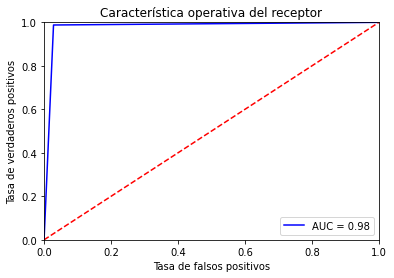

In [37]:
#Clasificador Naive Bayes
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Característica operativa del receptor')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

models.append("Clasificador Naive Bayes")
scores.append(acc*100)

------------------------------------------
Accuracy =  99.9590790048014  %
[[ 7224     8]
 [    7 29417]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7232
         1.0       1.00      1.00      1.00     29424

    accuracy                           1.00     36656
   macro avg       1.00      1.00      1.00     36656
weighted avg       1.00      1.00      1.00     36656



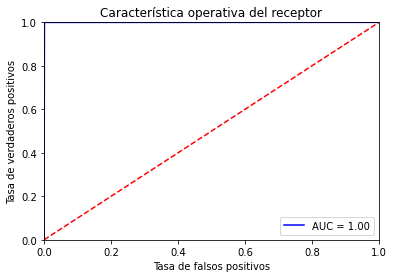

In [38]:
#Clasificador Decision Tree 
from sklearn import tree
clf = tree.DecisionTreeClassifier(splitter = "random", criterion = "entropy", max_depth = 20)
 
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computando accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Característica operativa del receptor')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

models.append("Clasificador Árbol de decisión")
scores.append(acc*100)

------------------------------------------
Accuracy =  99.98090353557399  %
[[ 7232     0]
 [    7 29417]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7232
         1.0       1.00      1.00      1.00     29424

    accuracy                           1.00     36656
   macro avg       1.00      1.00      1.00     36656
weighted avg       1.00      1.00      1.00     36656



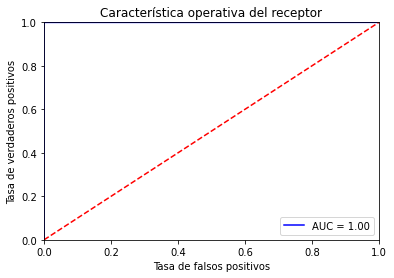

------------------------------------------
Accuracy =  99.97271933653427  %
[[ 7229     3]
 [    7 29417]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7232
         1.0       1.00      1.00      1.00     29424

    accuracy                           1.00     36656
   macro avg       1.00      1.00      1.00     36656
weighted avg       1.00      1.00      1.00     36656



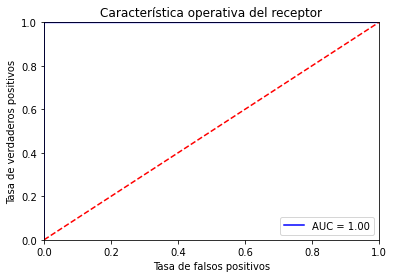

In [39]:
#Clasificador Random Forest
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)

report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Característica operativa del receptor')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

models.append("Clasificador Random Forest")
scores.append(acc*100)


#Clasificador K-Nearest Neighbour
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# ajustar un modelo de k-próximo a los datos
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)

report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Característica operativa del receptor')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

models.append("Clasificador K-Nearest neighbour")
scores.append(acc*100)

In [40]:
#Marco de datos con modelos y sus respectivas puntuaciones
dat = pd.DataFrame(index=[1,2,3,4])
dat["Modelo"] = models
dat["Puntuación"] = scores
dat.set_index("Modelo")

,Puntuación
Modelo,
Clasificador Naive Bayes,98.472283
Clasificador Árbol de decisión,99.959079
Clasificador Random Forest,99.980904
Clasificador K-Nearest neighbour,99.972719
